# ACTIVIDAD GBM

JULIA HERNÁNDEZ CÁRDENAS

**Aplicación 1: Comparar diferentes composiciones de portafolio**

Objetivo: Analizar cómo cambian los rendimientos y el riesgo al modificar los pesos de los activos.

Instrucciones:

Definan tres combinaciones distintas de pesos entre los activos (ejemplo: Portafolio A = 70%/30%, Portafolio B = 50%/50%, Portafolio C = 20%/80%).

Simulen al menos 1,000 trayectorias de rendimientos para cada portafolio.

Calculen y comparen:

Rendimiento promedio.

Desviación estándar.

Construyan gráficos para cada portafolio:

Histogramas o boxplots de los rendimientos simulados.

Un cuadro comparativo con medias y desviaciones estándar.

Redacten una breve conclusión indicando qué portafolio resulta más riesgoso y cuál se percibe más atractivo. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [2]:
stocks = ['V', 'MCD']

prices = yf.download(stocks,start = '2020-01-01', end = '2025-01-01', progress = False)['Close']
prices.head()

/var/folders/35/0jxsxnld78z8vjnqsg20btl00000gn/T/ipykernel_18168/645554553.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks,start = '2020-01-01', end = '2025-01-01', progress = False)['Close']


Ticker,MCD,V
Date,,
2020-01-02,175.813522,183.549072
2020-01-03,175.191818,182.089249
2020-01-06,177.161957,181.695541
2020-01-07,177.424637,181.215332
2020-01-08,180.296600,184.317383


In [3]:
def get_data(stocks, start, end):
    ## descarga datos
    prices = yf.download(stocks, start, end, progress=False)['Close']
    returns = prices.pct_change()
    mean_returns = returns.mean()
    matriz_cov = returns.cov()
    return mean_returns, matriz_cov, prices

def simular_precios(num_simulaciones, weights, mean_returns, matriz_cov, prices, num_dias):
    
    #matriz para contener los rendimientos simulados de tu portafolio
    portfolio_returns = np.full(shape = (num_simulaciones, num_dias), fill_value = 0.0)
    
    for i in range(num_simulaciones):
        L = np.linalg.cholesky(matriz_cov)
        Z = np.random.normal(0, 1, (num_dias, len(weights)))
        daily_returns = np.array(mean_returns) + Z @ L.T
        
        daily_portfolio_returns = (daily_returns @ weights)
        cumulative_returns = np.cumprod(daily_portfolio_returns + 1)
        portfolio_returns[i,:] = cumulative_returns
        
    return portfolio_returns

## 50/50

In [4]:
stocks = ['V', 'MCD']
weights = [0.5, 0.5]
num_dias = 10

mean_returns, matriz_cov, prices= get_data(stocks, dt.datetime.now() - dt.timedelta(days = 365 * 4), dt.datetime.now())

capital = 10000
rendimientos_portafolio_50 = capital * simular_precios(1000, weights, mean_returns, matriz_cov, prices, num_dias)
rendimientos_portafolio_50[-1,:]

/var/folders/35/0jxsxnld78z8vjnqsg20btl00000gn/T/ipykernel_18168/3310494723.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


array([10073.5651141 , 10021.89970057, 10027.7916387 , 10108.77073173,
        9789.67438741, 10046.44748102, 10001.49379648, 10167.76374782,
       10129.75167392,  9845.04446507])

In [5]:
rend_50 = rendimientos_portafolio_50.mean()
rend_50

10016.236636938496

In [6]:
std_50 = rendimientos_portafolio_50.std()
std_50

241.25816872662577

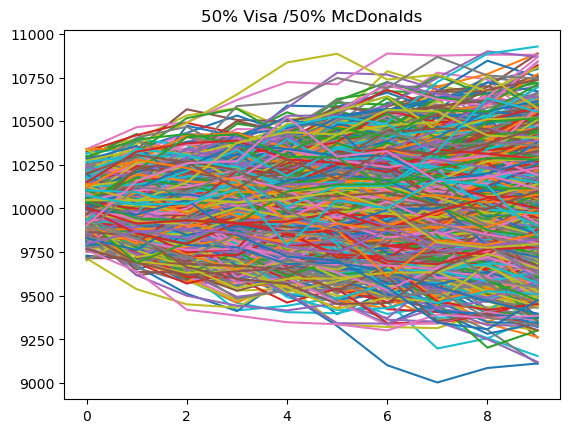

In [25]:
plt.title('50% Visa /50% McDonalds')
plt.plot(rendimientos_portafolio_50.T)
plt.show() 

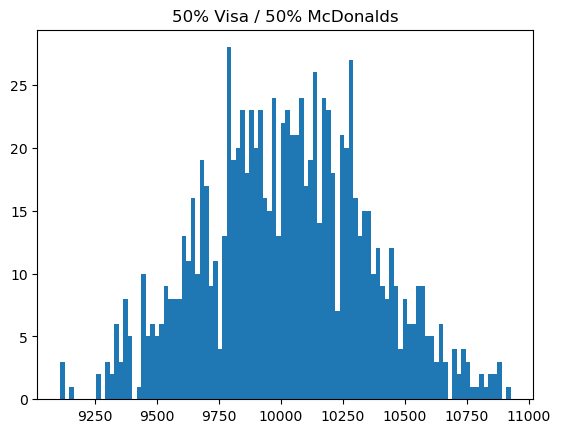

In [26]:
plt.title('50% Visa / 50% McDonalds')
plt.hist(rendimientos_portafolio_50[:,-1], bins = 100)
plt.show()

# 80/20

In [9]:
stocks = ['V', 'MCD']
weights = [0.8, 0.2]
num_dias = 10

mean_returns, matriz_cov, prices= get_data(stocks, dt.datetime.now() - dt.timedelta(days = 365 * 4), dt.datetime.now())

capital = 10000
rendimientos_portafolio_80 = capital * simular_precios(1000, weights, mean_returns, matriz_cov, prices, num_dias)
rendimientos_portafolio_80[-1,:]

/var/folders/35/0jxsxnld78z8vjnqsg20btl00000gn/T/ipykernel_18168/3310494723.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


array([9962.76031958, 9918.74747431, 9828.59114444, 9851.69827974,
       9778.60119825, 9856.62658965, 9785.54099096, 9626.99849473,
       9640.65913964, 9609.53612791])

In [10]:
rend_80 = rendimientos_portafolio_80.mean().round(4)
rend_80

10014.9899

In [11]:
std_80 = rendimientos_portafolio_80.std().round(4)
std_80

237.4681

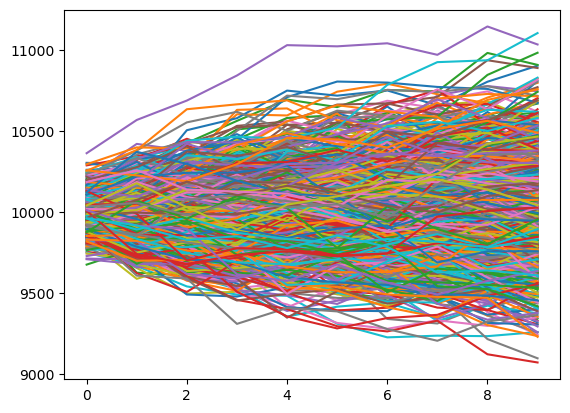

In [12]:
plt.plot(rendimientos_portafolio_80.T)
plt.show()

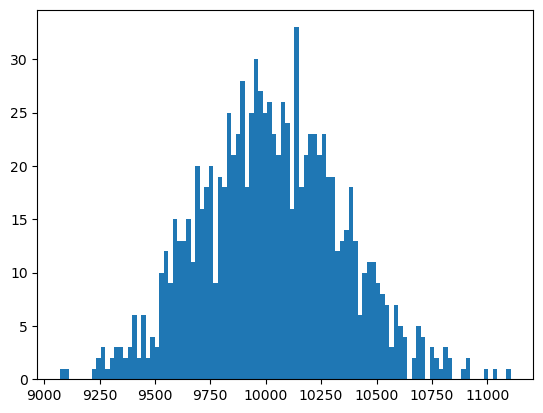

In [13]:
plt.hist(rendimientos_portafolio_80[:,-1], bins = 100)
plt.show()

# 20/80

In [14]:
stocks = ['V', 'MCD']
weights = [0.2, 0.8]
num_dias = 10

mean_returns, matriz_cov, prices= get_data(stocks, dt.datetime.now() - dt.timedelta(days = 365 * 4), dt.datetime.now())

capital = 10000
rendimientos_portafolio_20 = capital * simular_precios(1000, weights, mean_returns, matriz_cov, prices, num_dias)
rendimientos_portafolio_20[-1,:]

/var/folders/35/0jxsxnld78z8vjnqsg20btl00000gn/T/ipykernel_18168/3310494723.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


array([9896.24383206, 9903.61010614, 9902.51158782, 9895.0451858 ,
       9904.79306612, 9749.21941904, 9848.80773078, 9676.81183424,
       9688.36220225, 9732.63559374])

In [15]:
rend_20 = rendimientos_portafolio_20.mean().round(4)
rend_20

10022.7304

In [16]:
std_20 = rendimientos_portafolio_20.std().round(4)
std_20

293.2506

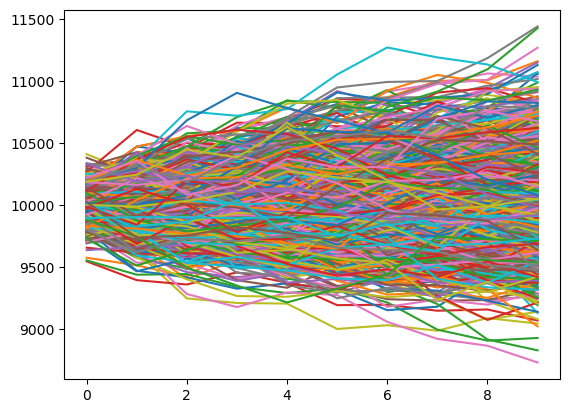

In [17]:
plt.plot(rendimientos_portafolio_20.T)
plt.show()

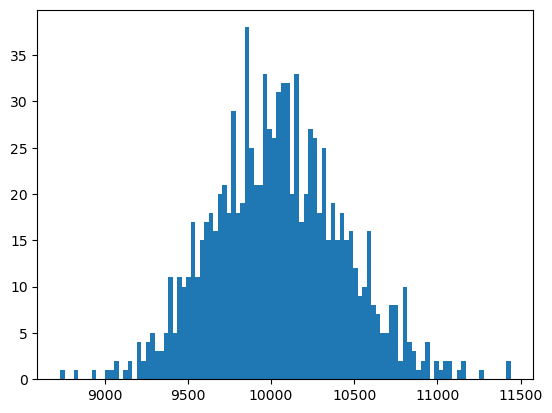

In [18]:
plt.hist(rendimientos_portafolio_20[:,-1], bins = 100)
plt.show()

In [19]:
resultados = pd.DataFrame({
    "Media": [rend_50, rend_80, rend_20],
    "Desviación Estándar": [std_50, std_80, std_20]
}, index=["50/50", "80/20", "20/80"])

print(resultados)

              Media  Desviación Estándar
50/50  10016.236637           241.258169
80/20  10014.989900           237.468100
20/80  10022.730400           293.250600


comparando los rendimientos y sus riesgos, el que se percibe más atractivo podría ser el de 50/50, ya que tiene un buen rendimiento y el riesgo más bajo. El portafolio con 20% Visa y 80% McDonalds, a pesar de tener mayores rendimientos, el riesgo aumenta demasiado, por lo que no recomendaría invertir en este. 

**Aplicación 2: Estimación de métricas de riesgo**

Objetivo: Cuantificar el riesgo de un portafolio a partir de las simulaciones.

Instrucciones:

Seleccionen un portafolio (puede ser uno de la Aplicación 1).

A partir de sus simulaciones, calculen:

Probabilidad de pérdida: P(r < 0).

Valor en Riesgo (VaR) al 95% y al 99%.

Expected Shortfall (o CVaR) al 95%.

Representen los resultados gráficamente:

Histograma de los rendimientos simulados, señalando las zonas correspondientes al VaR.

Una tabla con las métricas obtenidas.

Interpreten los resultados:

¿Qué tan probable es perder dinero?

¿Qué tan graves pueden ser las pérdidas en los peores escenarios? 

In [20]:
import numpy as np
import pandas as pd

def metricas_riesgo(rendimientos_portafolio_50, nivel_95=0.05, nivel_99=0.01):

    prob_perdida = np.mean(rendimientos_portafolio_50 < 0)
    
    var_95 = np.percentile(rendimientos_portafolio_50, 100 * nivel_95)
    var_99 = np.percentile(rendimientos_portafolio_50, 100 * nivel_99)

    cvar_95 = rendimientos_portafolio_50[rendimientos_portafolio_50 <= var_95].mean()

    resultados = pd.DataFrame({
        "Métrica": [
            "Probabilidad de pérdida",
            "VaR 95%",
            "VaR 99%",
            "Expected Shortfall (CVaR) 95%"
        ],
        "Valor": [
            prob_perdida,
            var_95,
            var_99,
            cvar_95
        ]
    })

    return resultados


np.random.seed(42)
rendimientos_portafolio_50_simulado = np.random.normal(loc=0.0005, scale=0.015, size=1000)

resultados = metricas_riesgo(rendimientos_portafolio_50_simulado)
print("--- Resultados de Métricas de Riesgo ---")
print(resultados.to_markdown(index=False, floatfmt=".4f"))

--- Resultados de Métricas de Riesgo ---
| Métrica                       |   Valor |
|:------------------------------|--------:|
| Probabilidad de pérdida       |  0.4770 |
| VaR 95%                       | -0.0224 |
| VaR 99%                       | -0.0307 |
| Expected Shortfall (CVaR) 95% | -0.0284 |


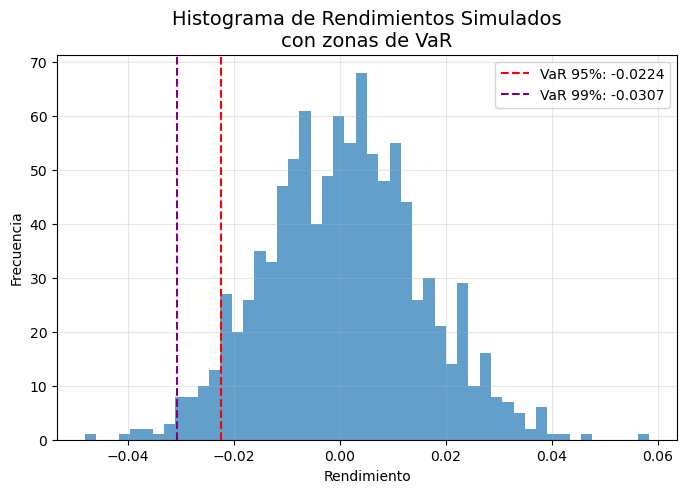

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.hist(rendimientos_portafolio_50_simulado, bins=50, alpha=0.7)

var_95 = resultados.loc[resultados["Métrica"] == "VaR 95%", "Valor"].iloc[0]
var_99 = resultados.loc[resultados["Métrica"] == "VaR 99%", "Valor"].iloc[0]

plt.axvline(var_95, label=f"VaR 95%: {var_95:.4f}", color='red', linestyle='--')
plt.axvline(var_99, label=f"VaR 99%: {var_99:.4f}", color='purple', linestyle='--')

plt.title("Histograma de Rendimientos Simulados\ncon zonas de VaR", fontsize=14)
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)
 
plt.show()

**¿Qué tan probable es perder dinero? ¿Qué tan graves pueden ser las pérdidas en los peores escenarios?**

Hay un 47% de probabilidad (basada en datos históricos/simulados) de que, en un periodo dado, el portafolio tenga un rendimiento negativo. 

En el 5% de los peores escenarios, la pérdida promedio esperada es del 4.01%

**Aplicación 3: Escenarios macroeconómicos**


Objetivo: Explorar cómo cambia el comportamiento del portafolio bajo distintos contextos económicos.

Instrucciones:

Definan tres escenarios:

Alcista: aumentar la media de los rendimientos en +0.001.

Bajista: disminuir la media en –0.001.

Base: usar los rendimientos originales.

Simulen al menos 10,000 trayectorias para cada escenario.

Construyan comparaciones gráficas:

Histogramas de las distribuciones en los tres escenarios.

Gráfico comparativo de medias y desviaciones estándar entre escenarios.

Analicen:

¿En qué escenario la probabilidad de pérdida es mayor?

¿Cuál presenta mayor dispersión de resultados?



In [22]:
def simular_portafolio(num_sim, weights, mean_returns, matriz_cov, num_dias):
    """
    Simula trayectorias de un portafolio dado un escenario de medias.
    """
    mu = mean_returns.values.astype(float)
    cov = matriz_cov.values.astype(float)
    w = np.array(weights)

    # Matriz de correlación (Cholesky)
    try:
        L = np.linalg.cholesky(cov)
    except np.linalg.LinAlgError:
        eps = 1e-8
        L = np.linalg.cholesky(cov + eps*np.eye(cov.shape[0]))

    # Simulaciones: rendimientos diarios de los activos
    Z = np.random.normal(0,1,(num_sim,num_dias,len(mu)))
    daily_asset_returns = Z @ L.T + mu    # (num_sim, num_dias, n_activos)

    # Rendimientos del portafolio
    daily_port = daily_asset_returns @ w  # (num_sim, num_dias)
    paths = np.cumprod(1+daily_port, axis=1)

    # Rendimiento acumulado final
    final_returns = paths[:,-1] - 1
    return final_returns


def escenarios_macro(num_sim, weights, mean_returns, matriz_cov, num_dias=252):
    escenarios = {
        "Base": mean_returns,
        "Alcista": mean_returns + 0.001,
        "Bajista": mean_returns - 0.001
    }
    resultados = {}
    for nombre, mu_mod in escenarios.items():
        resultados[nombre] = simular_portafolio(num_sim, weights, mu_mod, matriz_cov, num_dias)
    return resultados


weights = [0.5,0.2,0.3]   # Portafolio ejemplo
np.random.seed(42)

escenarios = escenarios_macro(
    num_sim=10000,
    weights=weights,
    mean_returns=mean_returns,
    matriz_cov=matriz_cov,
    num_dias=252
)


plt.figure(figsize=(12,5))
for i,(nombre,arr) in enumerate(escenarios.items(),1):
    plt.subplot(1,3,i)
    plt.hist(arr,bins=40)
    plt.title(f"Histograma – {nombre}")
    plt.xlabel("Rendimiento acumulado")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

stats = {
    nombre: {"Media": np.mean(arr), "DesvEst": np.std(arr)}
    for nombre, arr in escenarios.items()
}
df_stats = pd.DataFrame(stats).T

plt.figure(figsize=(7,4))
df_stats[["Media","DesvEst"]].plot(kind="bar")
plt.title("Comparación de medias y desviaciones por escenario")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
stats = {
    nombre: {
        "Media": np.mean(arr), 
        "DesviEst": np.std(arr),
        "Probabilidad de Pérdida": np.mean(arr < 0)
    }
    for nombre, arr in escenarios.items()
}
df_stats = pd.DataFrame(stats).T 

print("\nCuadro comparativo de escenarios:")
print(df_stats)

**¿En qué escenario la probabilidad de pérdida es mayor? ¿Cuál presenta mayor dispersión de resultados?**

En el escenario bajista, la probabilidad de pérdida es mayor. El portafolio alcista presenta mayor dispersión
